In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
                                                                    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [4]:
y_data = data['0']
del data['0']
x_data = data
del data


In [ ]:
x_data

In [ ]:
alphabets='abcdefghijklmnopqrstuvwxyz'
for i in range(26):
    plt.imshow(x_data[y_data==i].iloc[1][:].values.reshape((28,28)))
    plt.title(alphabets[i])
    plt.show()

In [6]:
labels=set(y_data)

In [ ]:
print('The number of the data is',y_data.shape[0])
print('The number of classes in the dataset is',len(labels))

In [ ]:
plt.figure(figsize=(15,6))
values_counts=y_data.value_counts()
values_counts=values_counts[values_counts.argsort()]
plt.bar(values_counts.index,values_counts.values)
plt.xticks([i for i in range(26)],[str(i) for i in range(26)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('The count of sample for each label')
plt.show()


In [7]:
y_data=tf.keras.utils.to_categorical(y_data,len(labels))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


In [ ]:
del x_data
del y_data


## Part 2

In [9]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [ ]:
model=get_model()

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])


# Part 3

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)

In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))


In [ ]:
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))

## LeakyReLU

In [ ]:
model=get_model(activation_function='LeakyReLU')

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [ ]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Tanh

In [ ]:
model=get_model(activation_function='tanh')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [ ]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Optimizer


## Momentum = 0.5

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.9

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.98

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.98), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Adam

In [17]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 19:07:44.470038: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 19:07:49.343966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 46s 5ms/step - loss: 1.4546 - accuracy: 0.6709 - val_loss: 0.4076 - val_accuracy: 0.8851
Epoch 2/10
9312/9312 [==============================] - 45s 5ms/step - loss: 0.6042 - accuracy: 0.8361 - val_loss: 0.3498 - val_accuracy: 0.9064
Epoch 3/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5362 - accuracy: 0.8601 - val_loss: 0.2838 - val_accuracy: 0.9248
Epoch 4/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5167 - accuracy: 0.8682 - val_loss: 0.2900 - val_accuracy: 0.9283
Epoch 5/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5046 - accuracy: 0.8740 - val_loss: 0.2906 - val_accuracy: 0.9260
Epoch 6/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.4983 - accuracy: 0.8766 - val_loss: 0.2679 - val_accuracy: 0.9306
Epoch 7/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.4971 - accuracy: 0.8798 - val_loss: 0.2958 - val_ac

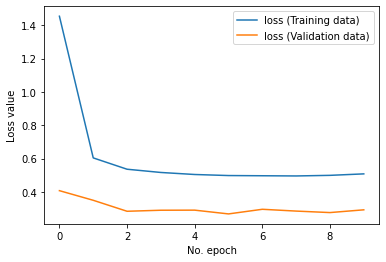

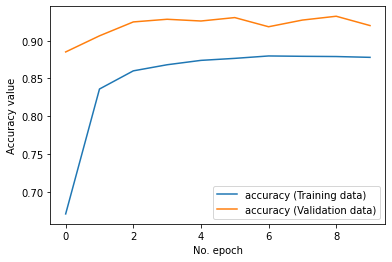

For Train Data:
              precision    recall  f1-score   support

           0      0.833     0.952     0.889     11049
           1      0.947     0.836     0.888      6864
           2      0.905     0.980     0.941     18673
           3      0.826     0.735     0.778      8175
           4      0.934     0.869     0.900      9180
           5      0.936     0.896     0.916       937
           6      0.871     0.866     0.869      4617
           7      0.935     0.743     0.828      5772
           8      0.970     0.727     0.831       898
           9      0.776     0.851     0.812      6874
          10      0.900     0.786     0.839      4521
          11      0.970     0.964     0.967      9249
          12      0.958     0.932     0.945      9856
          13      0.731     0.963     0.831     15222
          14      0.942     0.978     0.960     46311
          15      0.986     0.960     0.973     15511
          16      0.963     0.849     0.903      4730
          1

In [19]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Number of Epochs

In [21]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/20
9312/9312 [==============================] - 49s 5ms/step - loss: 1.4470 - accuracy: 0.6835 - val_loss: 0.4033 - val_accuracy: 0.8873
Epoch 2/20
9312/9312 [==============================] - 48s 5ms/step - loss: 0.5778 - accuracy: 0.8459 - val_loss: 0.3126 - val_accuracy: 0.9150
Epoch 3/20
9312/9312 [==============================] - 47s 5ms/step - loss: 0.5241 - accuracy: 0.8650 - val_loss: 0.2928 - val_accuracy: 0.9247
Epoch 4/20
9312/9312 [==============================] - 48s 5ms/step - loss: 0.5051 - accuracy: 0.8727 - val_loss: 0.2781 - val_accuracy: 0.9284
Epoch 5/20
9312/9312 [==============================] - 47s 5ms/step - loss: 0.4931 - accuracy: 0.8773 - val_loss: 0.2853 - val_accuracy: 0.9270
Epoch 6/20
9312/9312 [==============================] - 49s 5ms/step - loss: 0.4854 - accuracy: 0.8797 - val_loss: 0.2895 - val_accuracy: 0.9248
Epoch 7/20
9312/9312 [==============================] - 49s 5ms/step - loss: 0.4857 - accuracy: 0.8823 - val_loss: 0.2678 - val_ac

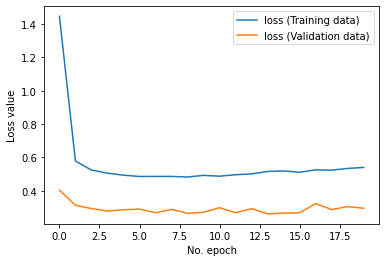

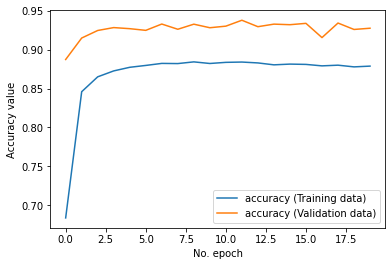

For Train Data:
              precision    recall  f1-score   support

           0      0.881     0.944     0.911     11049
           1      0.963     0.829     0.891      6864
           2      0.909     0.986     0.946     18673
           3      0.950     0.801     0.869      8175
           4      0.923     0.842     0.881      9180
           5      0.851     0.489     0.621       937
           6      0.980     0.812     0.888      4617
           7      0.987     0.624     0.764      5772
           8      0.974     0.671     0.795       898
           9      0.890     0.921     0.906      6874
          10      0.965     0.803     0.877      4521
          11      0.962     0.956     0.959      9249
          12      0.956     0.957     0.956      9856
          13      0.814     0.960     0.881     15222
          14      0.963     0.981     0.972     46311
          15      0.979     0.970     0.975     15511
          16      0.966     0.844     0.901      4730
          1

In [23]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Loss Function

In [10]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 19:39:50.869026: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 19:39:56.656745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0724 - accuracy: 0.0591 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 5/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 6/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_ac

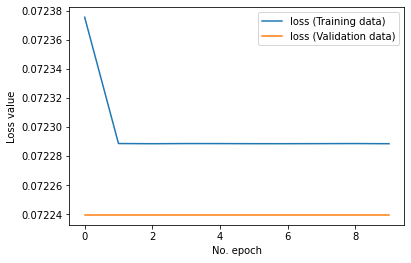

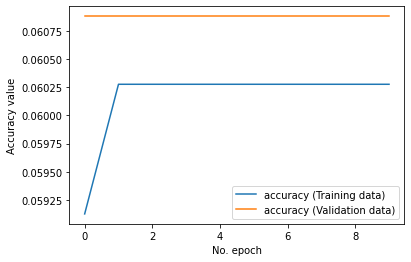

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     11149
           1      0.000     0.000     0.000      6925
           2      0.000     0.000     0.000     18789
           3      0.000     0.000     0.000      8171
           4      0.000     0.000     0.000      9158
           5      0.000     0.000     0.000       920
           6      0.000     0.000     0.000      4586
           7      0.000     0.000     0.000      5782
           8      0.000     0.000     0.000       899
           9      0.000     0.000     0.000      6803
          10      0.000     0.000     0.000      4514
          11      0.000     0.000     0.000      9283
          12      0.000     0.000     0.000      9821
          13      0.000     0.000     0.000     15121
          14      0.000     0.000     0.000     46104
          15      0.000     0.000     0.000     15447
          16      0.000     0.000     0.000      4701
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Regularization

## L2 Regularization

In [13]:
def get_model(activation_function='relu'):
    regularizer_parameter=0.0001
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(128, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [14]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.8182 - accuracy: 0.8486 - val_loss: 0.3531 - val_accuracy: 0.9193
Epoch 2/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.3161 - accuracy: 0.9309 - val_loss: 0.3134 - val_accuracy: 0.9309
Epoch 3/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.2907 - accuracy: 0.9416 - val_loss: 0.2705 - val_accuracy: 0.9480
Epoch 4/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.2837 - accuracy: 0.9454 - val_loss: 0.2751 - val_accuracy: 0.9477
Epoch 5/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.2779 - accuracy: 0.9477 - val_loss: 0.3003 - val_accuracy: 0.9448
Epoch 6/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2754 - accuracy: 0.9501 - val_loss: 0.2642 - val_accuracy: 0.9515
Epoch 7/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2778 - accuracy: 0.9496 - val_loss: 0.2645 - val_ac

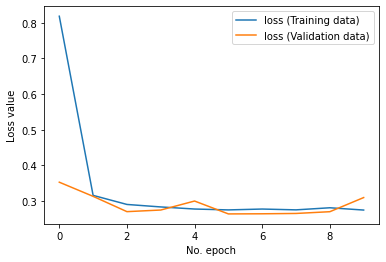

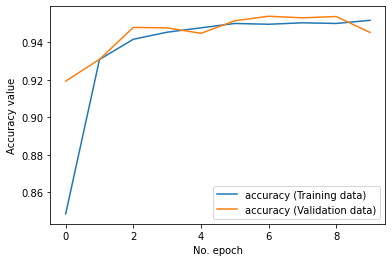

For Train Data:
              precision    recall  f1-score   support

           0      0.909     0.973     0.940     11149
           1      0.948     0.887     0.916      6925
           2      0.984     0.941     0.962     18789
           3      0.913     0.908     0.910      8171
           4      0.911     0.936     0.923      9158
           5      0.854     0.966     0.907       920
           6      0.882     0.881     0.881      4586
           7      0.943     0.863     0.901      5782
           8      0.906     0.776     0.836       899
           9      0.965     0.814     0.883      6803
          10      0.854     0.949     0.899      4514
          11      0.933     0.982     0.957      9283
          12      0.941     0.973     0.957      9821
          13      0.937     0.950     0.943     15121
          14      0.977     0.979     0.978     46104
          15      0.946     0.978     0.962     15447
          16      0.881     0.779     0.827      4701
          1

In [16]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Dropout

In [ ]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))
